<a href="https://colab.research.google.com/github/gustavougarte1/DataScience/blob/main/Desafio%20final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# Carregar os dados dos clientes e estados especificando o delimitador correto
clientes_df = pd.read_csv('/content/adesao_investimentos.csv', delimiter='|')
estados_df = pd.read_csv('/content/estado_regiao.csv', delimiter=';', encoding='latin-1')

# Exibir as primeiras linhas dos DataFrames
clientes_df.head(), estados_df.head()

(   idade    estado_civil escolaridade possui_inadimplencia  saldo_carteira  \
 0   45.0      casado (a)     superior                  não             242   
 1   42.0      casado (a)        medio                  não            1289   
 2   23.0    solteiro (a)     superior                  não             363   
 3   58.0  divorciado (a)     superior                  não            1382   
 4   50.0      casado (a)        medio                  não            3357   
 
   fez_emprestimo  ultimo_contato_tempo  numero_contatos fez_investimento  \
 0            não                   587                1              sim   
 1            não                   250                4              sim   
 2            não                    16               18              não   
 3            não                   700                1              sim   
 4            não                   239                4              sim   
 
    cod_estado  
 0          27  
 1          11  
 2       

In [10]:
# Verificar valores ausentes e duplicados nos datasets
clientes_df.info(), estados_df.info()

# Tratar valores ausentes (moda para categóricos e média para numéricos)
clientes_df.fillna({'idade': clientes_df['idade'].mean(),
                    'estado_civil': clientes_df['estado_civil'].mode()[0],
                    'escolaridade': clientes_df['escolaridade'].mode()[0],
                    'possui_inadimplencia': clientes_df['possui_inadimplencia'].mode()[0],
                    'saldo_carteira': clientes_df['saldo_carteira'].mean(),
                    'fez_emprestimo': clientes_df['fez_emprestimo'].mode()[0],
                    'ultimo_contato_tempo': clientes_df['ultimo_contato_tempo'].mean(),
                    'numero_contatos': clientes_df['numero_contatos'].mean(),
                    'fez_investimento': clientes_df['fez_investimento'].mode()[0]}, inplace=True)

estados_df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1545 entries, 0 to 1544
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   idade                 1539 non-null   float64
 1   estado_civil          1545 non-null   object 
 2   escolaridade          1534 non-null   object 
 3   possui_inadimplencia  1545 non-null   object 
 4   saldo_carteira        1545 non-null   int64  
 5   fez_emprestimo        1545 non-null   object 
 6   ultimo_contato_tempo  1545 non-null   int64  
 7   numero_contatos       1545 non-null   int64  
 8   fez_investimento      1545 non-null   object 
 9   cod_estado            1545 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 120.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_estado  27 non-null     int64

In [11]:
# Realizar a integração (inner join) das tabelas
integrated_df = pd.merge(clientes_df, estados_df, left_on='cod_estado', right_on='id_estado', how='inner')

# Exibir as primeiras linhas do DataFrame integrado
integrated_df.head()

,idade,estado_civil,escolaridade,possui_inadimplencia,saldo_carteira,fez_emprestimo,ultimo_contato_tempo,numero_contatos,fez_investimento,cod_estado,id_estado,sigla,estado,regiao,pais
0,45.000000,casado (a),superior,não,242,não,587,1,sim,27,27,TO,Tocantins,Norte,Brasil
1,41.358025,casado (a),fundamental,não,7735,não,220,1,não,27,27,TO,Tocantins,Norte,Brasil
2,57.000000,casado (a),superior,não,27069,sim,174,3,não,27,27,TO,Tocantins,Norte,Brasil
3,38.000000,divorciado (a),superior,não,1513,não,330,1,não,27,27,TO,Tocantins,Norte,Brasil
4,32.000000,solteiro (a),medio,não,230,não,442,1,sim,27,27,TO,Tocantins,Norte,Brasil


In [12]:
# Filtrar clientes de São Paulo e calcular a média das idades
sp_clients = integrated_df[integrated_df['estado'] == 'São Paulo']
mean_age_sp = sp_clients['idade'].mean()
mean_age_sp

42.16393442622951

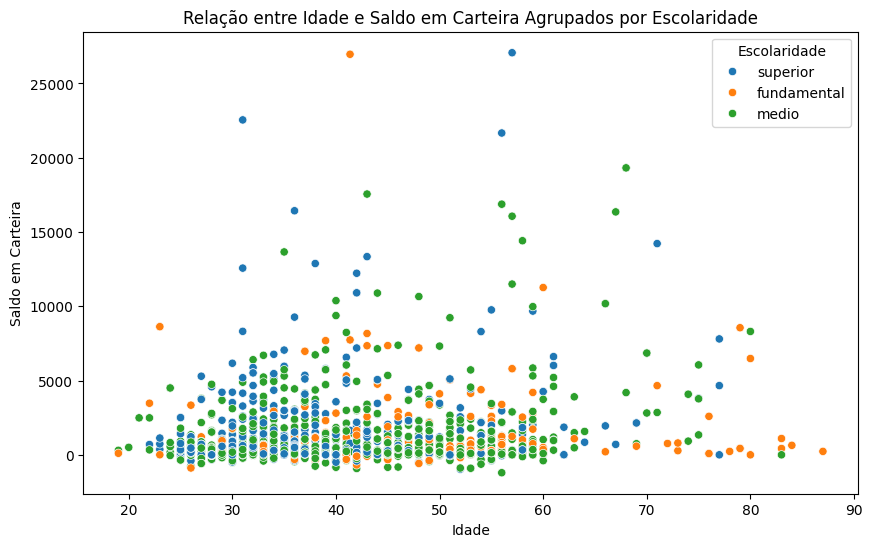

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de dispersão entre idade e saldo em carteira, agrupados por escolaridade
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='saldo_carteira', hue='escolaridade', data=integrated_df)
plt.title('Relação entre Idade e Saldo em Carteira Agrupados por Escolaridade')
plt.xlabel('Idade')
plt.ylabel('Saldo em Carteira')
plt.legend(title='Escolaridade')
plt.show()

In [14]:
# Calcular a média de saldo em carteira por região
mean_balance_region = integrated_df.groupby('regiao')['saldo_carteira'].mean()
mean_balance_region.idxmax()

'Sudeste'

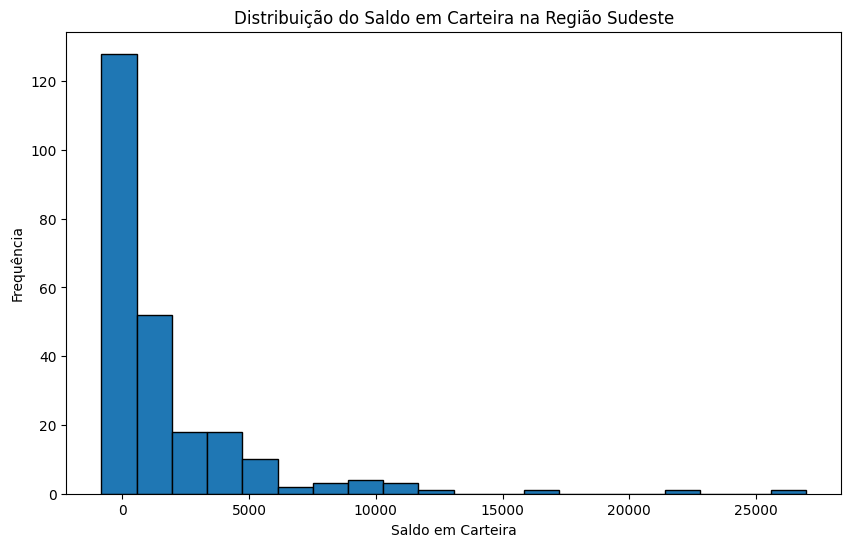

In [15]:
# Filtrar clientes da região sudeste
sudeste_clients = integrated_df[integrated_df['regiao'] == 'Sudeste']

# Histograma do saldo em carteira
plt.figure(figsize=(10, 6))
plt.hist(sudeste_clients['saldo_carteira'], bins=20, edgecolor='k')
plt.title('Distribuição do Saldo em Carteira na Região Sudeste')
plt.xlabel('Saldo em Carteira')
plt.ylabel('Frequência')
plt.show()

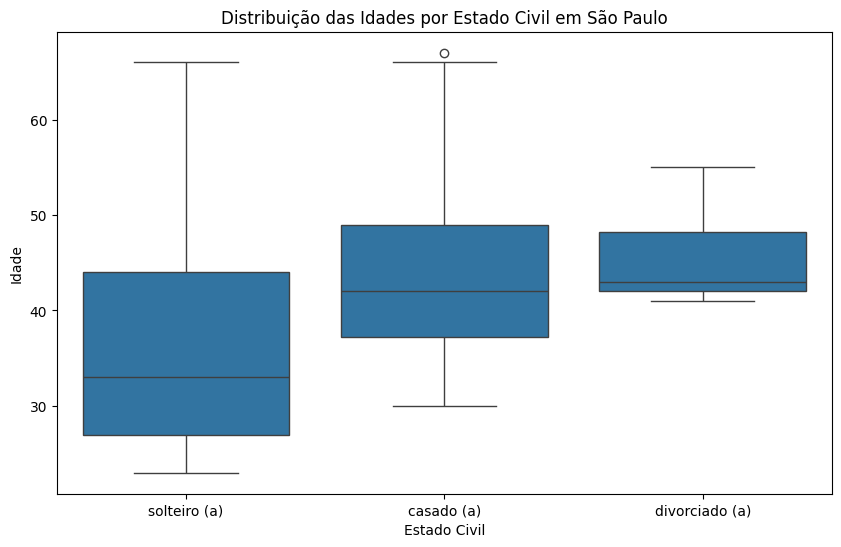

In [16]:
# Boxplot da distribuição das idades por estado civil para clientes de São Paulo
sp_clients = integrated_df[integrated_df['estado'] == 'São Paulo']

plt.figure(figsize=(10, 6))
sns.boxplot(x='estado_civil', y='idade', data=sp_clients)
plt.title('Distribuição das Idades por Estado Civil em São Paulo')
plt.xlabel('Estado Civil')
plt.ylabel('Idade')
plt.show()

In [19]:
# Estado com maior soma de saldo em carteira
total_balance_state = integrated_df.groupby('estado')['saldo_carteira'].sum()
total_balance_state.idxmax()

'Espírito Santo'

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# Separar os dados em features e target
X = integrated_df.drop('fez_investimento', axis=1)
y = integrated_df['fez_investimento']

# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

# Identificar colunas categóricas
categorical_cols = X_res.select_dtypes(include=['object']).columns

# Aplicar One-Hot Encoding nas colunas categóricas
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X_res[categorical_cols]))
X_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Concatenar as features numéricas com as features codificadas
X_res = pd.concat([X_res.drop(categorical_cols, axis=1), X_encoded], axis=1)

# Separar os dados em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Criar o modelo de Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=100)
rf_model.fit(X_train, y_train)

# Importâncias das features
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.idxmax()

'ultimo_contato_tempo'

In [23]:
# Avaliação do modelo
from sklearn.metrics import accuracy_score # Import the accuracy_score function
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7540322580645161

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusão e relatório de classificação
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix, class_report['1']['recall']

KeyError: '1'

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Matriz de confusão e relatório de classificação
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Assuming your classes are 'sim' and 'não', access recall for 'sim'
conf_matrix, class_report['sim']['recall']

(array([[100,  35],
        [ 26,  87]]),
 0.7699115044247787)

In [26]:
from sklearn.metrics import confusion_matrix

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Quantidade de acertos para a classe que fez investimentos (classe 1)
true_positives = conf_matrix[1, 1]
true_positives

87

In [28]:
# Relatório de classificação
class_report = classification_report(y_test, y_pred, output_dict=True)

# Suporte para a classe que não realizou o investimento (classe 'não')
support_class_nao = class_report['não']['support'] # Change the key from '0' to 'não'
support_class_nao

135

In [29]:
from sklearn.metrics import classification_report

# Relatório de classificação
class_report = classification_report(y_test, y_pred, output_dict=True)

# Precisão para cada classe
precision_class_0 = class_report['0']['precision']
precision_class_1 = class_report['1']['precision']

# Determinar a classe com maior precisão
if precision_class_0 > precision_class_1:
    maior_precisao_classe = 'Classe 0 (Não fez investimento)'
else:
    maior_precisao_classe = 'Classe 1 (Fez investimento)'

maior_precisao_classe

KeyError: '0'

In [30]:
from sklearn.metrics import classification_report

# Relatório de classificação
class_report = classification_report(y_test, y_pred, output_dict=True)

# Precisão para cada classe, using the correct keys 'não' and 'sim'
precision_class_nao = class_report['não']['precision'] # Changed key to 'não'
precision_class_sim = class_report['sim']['precision'] # Changed key to 'sim'

# Determinar a classe com maior precisão
if precision_class_nao > precision_class_sim:
    maior_precisao_classe = 'Classe não (Não fez investimento)'
else:
    maior_precisao_classe = 'Classe sim (Fez investimento)'

maior_precisao_classe

'Classe não (Não fez investimento)'